In [ ]:
#Chn2Pyr testing

In [ ]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [ ]:
#do not rerun
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
#fileList = ['class_pyramidalcell_original_modified.hoc','class_axoaxoniccell.hoc']
fileList = ['class_pyramidalcell.hoc','class_axoaxoniccell.hoc']
#fileList = ['class_pyramidalcell.hoc']
#for each file, load it into the hoc interpreter so it can be accessed
for item in fileList:
    h.load_file(os.path.join("biophys_components/templates/",item))
callNames = ["h." + fileList[i].split('_')[1].split('.')[0] + "()" for i in range(len(fileList))]
callNames.sort()

for i in range(len(callNames)):
    myCell = eval(callNames[i])
#    for sec in h.allsec(myCell):
#        print(sec)

In [ ]:

AxonNo = 6
#InjList = [np.arange(400,500,50),#aac
#          np.arange(200,550,50)]#pyr
a = 200
InjList = [np.array([200]),np.array([a])]
allTrials = []
allTrialsVas = []
#allTrialsiNasoma = []
for i in range(len(callNames)):
    myCell = eval(callNames[i])#make the cell
    Ia = InjList[i] /1000# nA ->pA# the current sweep for this particular cell
    allVs = []
    allVas = []
    #alliNasoma = []
    for j in range(len(Ia)):#test it at each current injection and save       
        #iclamp = h.IClamp(myCell.axon[AxonNo](0.5))
        iclamp = h.IClamp(myCell.soma[0](0.5))
        iclamp.delay = 300
        iclamp.dur = 2
        iclamp.amp = Ia[j]
        
        v = h.Vector().record(myCell.soma[0](0.5)._ref_v)
        #va = h.Vector().record(myCell.axon[0](0.5)._ref_v)
        #iNasoma = h.Vector().record(myCell.soma[0](0.5)._ref_ina)
        
        h.dt=0.2
        h.finitialize(-63)
        h.continuerun(1500)
        
        #iNaSoma = np.array(iNasoma)
        V = np.array(v)
        #Va = np.array(va)
        
        
        allVs.append(V)
        #allVas.append(Va)
        #alliNasoma.append(iNasoma)
        
    allTrials.append([allVs])#list of lists; each sublist has the current sweeps for the given cell
    #allTrialsVas.append([allVas])
    #allTrialsiNasoma.append([alliNasoma])
    
res = np.concatenate(allTrials,axis=1)[0].T#how I plotted it the first time.
#resVa = np.concatenate(allTrialsVas,axis=1)[0].T#how I plotted it the first time.
#resIna =  np.concatenate(allTrialsiNasoma,axis=1)[0].T#how I plotted it the first time.

time = np.arange(0,res.shape[0]*h.dt/1000,h.dt/1000)#time in seconds


"""
start = 0
fig,axs = plt.subplots(1,2,figsize=(15,4))
axs[0].plot(time[:5850],res[:5850,start:start+len(InjList[1])])
axs[0].set_title('pyramidal cell Soma')
axs[0].set_xlim([0.25, 0.35])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Potential (mV)')

axs[1].plot(time[:5850],resVa[:5850,start:start+len(InjList[1])])
axs[1].set_xlim([0.25, 0.35])
axs[1].set_title('pyramidal cell axon')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Potential (mV)')


plt.show()


"""
fig,axs = plt.subplots(1,2,figsize=(15,4))
plt.subplots_adjust(hspace=0.5)
start,k = 0,0
for j in range(2):
    axs[j].plot(time[:5850],res[:5850,start:start+len(InjList[k])])
    axs[j].set_title(callNames[k].split('.')[1].split('()')[0])
    axs[j].set_xlabel('Time (s)')
    axs[j].set_ylabel('Potential (mV)')
    start += len(InjList[k])

    k+=1

#plt.savefig('current sweeps.png',dpi=500)

In [ ]:
callNames

# The Synapse

In [1]:
import numpy as np
from neuron import h
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

In [2]:
h.load_file('stdrun.hoc')
#h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","nrnmech.dll"))
h.nrn_load_dll(os.path.join("biophys_components","mechanisms","modfiles","x86_64",".libs","libnrnmech.so"))
h.load_file(os.path.join("biophys_components/templates/",'class_pyramidalcell.hoc'))
h.load_file(os.path.join("biophys_components/templates/",'class_axoaxoniccell.hoc'))

1.0

In [3]:
Pyr = h.pyramidalcell()
AAC = h.axoaxoniccell()

iclamp = h.IClamp(AAC.soma[0](0.5))
iclamp.delay = 300
iclamp.dur = 10
iclamp.amp = 400/1000

vPyr = h.Vector().record(Pyr.soma[0](0.5)._ref_v)
vPyrAxon = h.Vector().record(Pyr.axon[6](0.5)._ref_v)
vAAC = h.Vector().record(AAC.soma[0](0.5)._ref_v)

syn = h.chn2pyr(Pyr.axon[6](0.5))
syn.initW = 18
isyn = h.Vector().record(syn._ref_igaba)
netcon = h.NetCon(AAC.soma[0](0.5)._ref_v, syn,10, 0.8, 1,sec=AAC.soma[0])

h.dt=0.1
h.finitialize(-63)
h.continuerun(1500)

vPyr = np.array(vPyr)
vAAC = np.array(vAAC)
isyn = np.array(isyn)

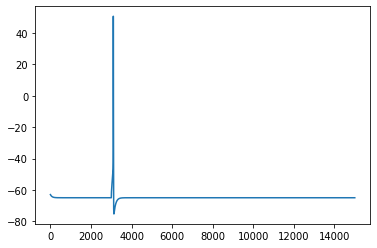

In [4]:
plt.plot(vAAC)

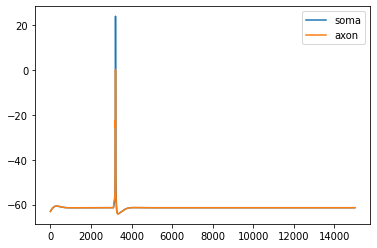

In [5]:
plt.plot(vPyr,label = 'soma')
plt.plot(vPyrAxon,label='axon')
plt.legend()

In [ ]:
plt.plot(isyn)
plt.xlim([3000,3400])

In [7]:
secList = []
for sec in h.allsec(Pyr):
    #print(sec)
    for seg in sec.allseg():
        secList.append(seg)
        print(seg)
secList = [str(item) for item in secList]


pyramidalcell[0].soma[0](0)
pyramidalcell[0].soma[0](0.5)
pyramidalcell[0].soma[0](1)
pyramidalcell[0].apical[0](0)
pyramidalcell[0].apical[0](0.166667)
pyramidalcell[0].apical[0](0.5)
pyramidalcell[0].apical[0](0.833333)
pyramidalcell[0].apical[0](1)
pyramidalcell[0].apical[1](0)
pyramidalcell[0].apical[1](0.1)
pyramidalcell[0].apical[1](0.3)
pyramidalcell[0].apical[1](0.5)
pyramidalcell[0].apical[1](0.7)
pyramidalcell[0].apical[1](0.9)
pyramidalcell[0].apical[1](1)
pyramidalcell[0].apical[2](0)
pyramidalcell[0].apical[2](0.0555556)
pyramidalcell[0].apical[2](0.166667)
pyramidalcell[0].apical[2](0.277778)
pyramidalcell[0].apical[2](0.388889)
pyramidalcell[0].apical[2](0.5)
pyramidalcell[0].apical[2](0.611111)
pyramidalcell[0].apical[2](0.722222)
pyramidalcell[0].apical[2](0.833333)
pyramidalcell[0].apical[2](0.944444)
pyramidalcell[0].apical[2](1)
pyramidalcell[0].apical[3](0)
pyramidalcell[0].apical[3](0.1)
pyramidalcell[0].apical[3](0.3)
pyramidalcell[0].apical[3](0.5)
pyramidalcell

In [ ]:
secList = secList[:secList.index('axoaxoniccell[0].soma[0](0)')]
#secList.index('pyramidalcell[1].axon[6](0.5)')

In [ ]:
secList

In [ ]:
count = 0
for i in secList:
    if '(1)' in i:
        if 'axon' not in i:
            count+=1
count

In [6]:
Pyr.all.printnames()

pyramidalcell[0].soma[0]
pyramidalcell[0].axon[0]
pyramidalcell[0].axon[1]
pyramidalcell[0].axon[2]
pyramidalcell[0].axon[3]
pyramidalcell[0].axon[4]
pyramidalcell[0].axon[5]
pyramidalcell[0].axon[6]
pyramidalcell[0].axon[7]
pyramidalcell[0].axon[8]
pyramidalcell[0].axon[9]
pyramidalcell[0].axon[10]
pyramidalcell[0].axon[11]
pyramidalcell[0].apical[0]
pyramidalcell[0].apical[1]
pyramidalcell[0].apical[2]
pyramidalcell[0].apical[3]
pyramidalcell[0].apical[4]
pyramidalcell[0].apical[5]
pyramidalcell[0].apical[6]
pyramidalcell[0].apical[7]
pyramidalcell[0].apical[8]
pyramidalcell[0].basal[0]
pyramidalcell[0].basal[1]
pyramidalcell[0].basal[2]
pyramidalcell[0].basal[3]


1.0

In [ ]:
dir(Pyr.all)

In [ ]:
dir(Pyr.all)

In [ ]:
Pyr.NumBasal

In [ ]:
Pyr.NumSoma

In [ ]:
dir(Pyr)

In [ ]:
secList.index('pyramidalcell[0].axon[6](0.5)')

In [ ]:
Pyr.axon[6].psection()

In [ ]:
len(secList)

In [ ]:
secList.index('pyramidalcell[1].axon[6](0.5)')

In [ ]:
mt = h.MechanismType(0)
mt1 = h.MechanismType(1)

In [ ]:
mname  = h.ref('')
for i in range(mt1.count()):
    mt1.select(i)
    mt1.selected(mname)
    print(mname[0])

In [ ]:
mname  = h.ref('')
for i in range(mt.count()):
    mt.select(i)
    mt.selected(mname)
    print(mname[0])

In [ ]:
dir(mt)

# testing

In [ ]:
h.topology()

In [ ]:
myCell.soma[0].children()

In [ ]:
myCell.axon[0].psection()

In [ ]:
#AAC = eval(callNames[0])
Pyr = h.pyramidalcell()


In [ ]:
for item in Pyr.axon[0].allseg():
    print(item)

In [ ]:
channelDict = Pyr.axon[0].psection()

In [ ]:
channelDict['ions']['na']

In [ ]:
channelDict

In [ ]:
h.psection(sec = Pyr.axon[5])

In [ ]:
h.psection(sec = Pyr.soma[0])

In [ ]:
static int _ode_spec1 () {_reset=0;
 {
   DW = 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) * ( lambda1 * omega ( _threadargscomma_ capoolcon , threshold1 , threshold2 ) - lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) * W ) ;
   Dr_gaba = AlphaTmax_gaba * on_gaba * ( 1.0 - r_gaba ) - Beta_gaba * r_gaba ;
   Dcapoolcon = - fCag * Afactor * Icatotal + ( Cainf - capoolcon ) / tauCa ;
   }
 return _reset;
}
 static int _ode_matsol1 () {
 DW = DW  / (1. - dt*( ( 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) )*( ( ( - ( lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) )*( 1.0 ) ) ) ) )) ;
 Dr_gaba = Dr_gaba  / (1. - dt*( ( AlphaTmax_gaba * on_gaba )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ) )) ;
 Dcapoolcon = Dcapoolcon  / (1. - dt*( ( ( ( - 1.0 ) ) ) / tauCa )) ;
  return 0;
}
 /*END CVODE*/
 static int release () {_reset=0;
 {
    W = W + (1. - exp(dt*(( 1e-12 * limitW * eta ( _threadargscomma_ capoolcon ) )*( ( ( - ( lambda2 * GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) )*( 1.0 ) ) ) ))))*(- ( ( ( ( 1e-12 )*( limitW ) )*( eta ( _threadargscomma_ capoolcon ) ) )*( ( ( lambda1 )*( omega ( _threadargscomma_ capoolcon , threshold1 , threshold2 ) ) ) ) ) / ( ( ( ( 1e-12 )*( limitW ) )*( eta ( _threadargscomma_ capoolcon ) ) )*( ( ( - ( ( lambda2 )*( GAP1 ( _threadargscomma_ GAPstart1 , GAPstop1 ) ) )*( 1.0 ) ) ) ) ) - W) ;
    r_gaba = r_gaba + (1. - exp(dt*(( AlphaTmax_gaba * on_gaba )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ))))*(- ( ( ( AlphaTmax_gaba )*( on_gaba ) )*( ( 1.0 ) ) ) / ( ( ( AlphaTmax_gaba )*( on_gaba ) )*( ( ( - 1.0 ) ) ) - ( Beta_gaba )*( 1.0 ) ) - r_gaba) ;
    capoolcon = capoolcon + (1. - exp(dt*(( ( ( - 1.0 ) ) ) / tauCa)))*(- ( ( ( - fCag )*( Afactor ) )*( Icatotal ) + ( ( Cainf ) ) / tauCa ) / ( ( ( ( - 1.0 ) ) ) / tauCa ) - capoolcon) ;
   }
  return 0;
}

In [ ]:
#using a synapse

In [ ]:
Pyr.axon[0](1).ri()

In [ ]:
Pyr.soma[0](1).ri()